Lecture: AI I - Basics 

Previous:
[**Chapter 3.2: Pandas**](../03_data/03_matplotlib.ipynb)

---

# Chapter 3.3: Visualisation with Matplotlib

- [Matplotlib](#matplotlib)
- [Gallery](#gallery)
- [Plot Structure](#plot-structure)
- [Axes Methods vs. Pyplot Methods](#axes-methods-vs-pyplot-methods)
- [Essential Plot Types](#essential-plot-types)
- [Styling](#styling)
- [More Annotations](#more-annotations)

## Matplotlib

[Matplotlib](https://matplotlib.org/stable/users/index.html) is the most widely used Python library for creating static, animated, and interactive visualizations. It provides a flexible plotting system inspired by MATLAB, allowing you to generate simple line charts as well as highly customized scientific figures. Many higher-level libraries, such as seaborn and pandas plotting, are built on top of Matplotlib, making it the cornerstone of the Python visualization ecosystem.

## Gallery

following the link below to explore a wide range of examples showcasing the capabilities of Matplotlib:

In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/stable/gallery/index",
    width="100%",
    height=750,
)

## Jupyter Backend

In Jupyter Notebooks, the special command `%matplotlib inline` is a magic function that changes how Matplotlib displays plots. Instead of opening plots in a separate interactive window, this directive makes sure that all plots are rendered directly inside the notebook cells.

In [2]:
%matplotlib inline

## Import Convention

When working with Matplotlib, the widely accepted convention is to import the `pyplot` [module](https://matplotlib.org/stable/api/pyplot_summary.html) under the alias `plt`:

```python
import matplotlib.pyplot as plt
```

In [3]:
import matplotlib.pyplot as plt

## Plot Structure

A typical Matplotlib plot consists of the following components:
* **Figure**: The entire window or page that will contain the plot(s).
* **Subplots and Axes**: Subplots are individual plots within the figure, arranged in a grid. Each subplot contains its own set of axes.
* **Axis**: The area where data is plotted, including the x and y axes.
* **Artists**: The visual elements of the plot, such as lines, markers, and text.
* **Legend and Annotations**: The legend explains the symbols or colors used in the plot, while annotations provide additional context or information about specific points.

### Figure

The [Figure](https://matplotlib.org/stable/api/figure_api.html) is the overall container that holds everything in a plot. Think of it as the “canvas” on which all subplots, axes, and labels are drawn. A single script can create multiple figures, each independent of the others.
`figsize` sets the width and height in inches.

In [4]:
fig = plt.figure(figsize=(5, 5))

<Figure size 500x500 with 0 Axes>

To show the plot we need to call the `.show()` method on the figure object or `plt.show()`.

In [5]:
fig = plt.figure(figsize=(5, 5))
fig.show()

/tmp/ipykernel_6125/3032297195.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 500x500 with 0 Axes>

To show an empty figure, we need to add a subplot to it.

/tmp/ipykernel_6125/4084723797.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


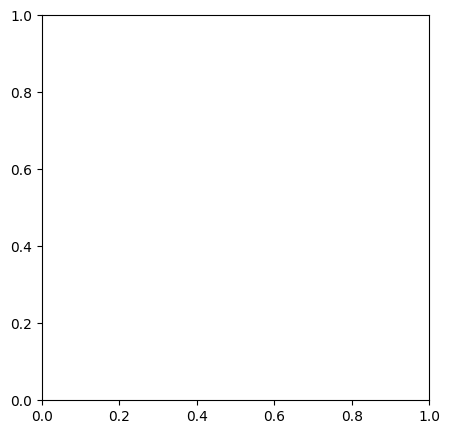

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.show()

### Subplots and Axes

Inside a figure, you can create subplots, which are grids of smaller plots. Each subplot is represented by an Axes object.
- Axes (plural: Axes) are the actual plots where your data lives.
- Each [Axes](https://matplotlib.org/stable/api/axes_api.html) has its own x-axis, y-axis, and labels.
- The `plt.subplots()` function is the most common way to create them.

> **Note**: We'll take another look at this later.

> **Hint**: We can also use the `plt.subplot()` function to create subplots directly, instead of:
> ```python
> fig = plt.figure()
> ax = fig.add_subplot(111)
> ```

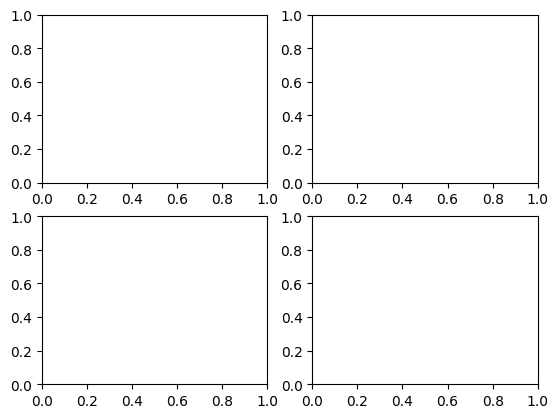

In [7]:
fig, ax = plt.subplots(2, 2)

#### Multiple Subplots

The most common way is using `plt.subplots()`, which creates both the figure and a grid of Axes. `axes` is returned as a NumPy array of Axes objects. You can index into it (e.g. `axes[0, 1]`) to work with a specific subplot. For 1D grids, it’s returned as a flat array for convenience. Use `fig.tight_layout()` to automatically adjust spacing between subplots.

/tmp/ipykernel_6125/635728649.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


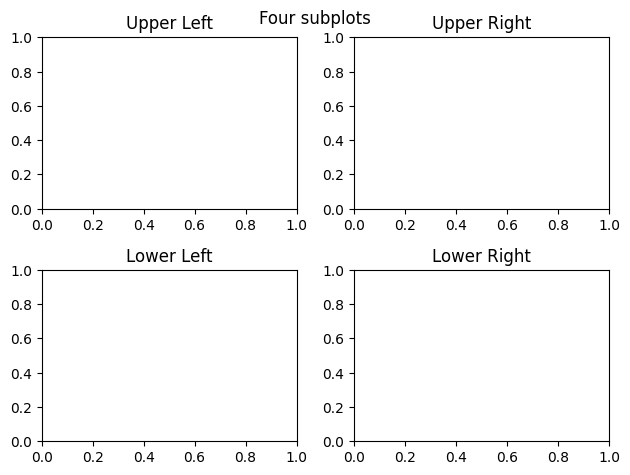

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()
fig.suptitle("Four subplots")

fig.show()

# Axis

Each [Axes](https://matplotlib.org/stable/api/axis_api.html) object contains an x-axis and a y-axis, which handle:
- Ticks (the small marks along the axis).
- Tick labels (numbers or text along the axis).
- Gridlines (optional).

/tmp/ipykernel_6125/4258761890.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


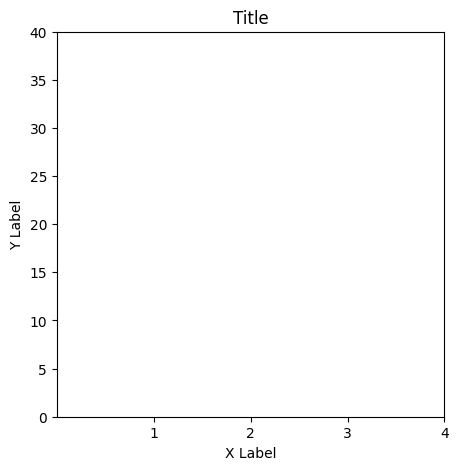

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Title")
ax.set_xticks([1, 2, 3, 4])
ax.set_ylim(0, 40)
fig.show()

In Matplotlib, each Axes object has a convenient method called `set()`, which allows you to configure multiple properties of the Axes in one call. Instead of calling individual methods like `set_xlabel()`, `set_ylabel()`, `set_title()`, or `set_xticks()`, you can use ax.set() and pass keyword arguments to adjust several aspects at once.

/tmp/ipykernel_6125/2292175349.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


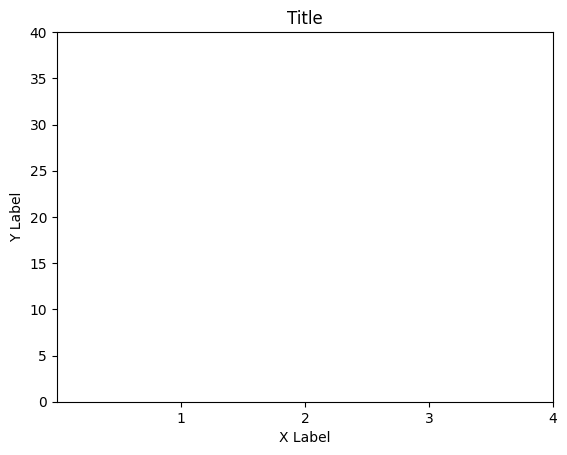

In [10]:
fig, ax = plt.subplots()
ax.set( 
    xlabel="X Label",
    ylabel="Y Label",
    title="Title",
    xticks=[1, 2, 3, 4],
    ylim=(0, 40)
)
fig.show()


### Artists (The Drawn Elements)

Everything visible in a plot — lines, text, legends, labels — is called an Artist in Matplotlib. Examples include:
- [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) → from `ax.plot()`
- Patch → for shapes like rectangles or circles
- Text → titles, axis labels, annotations

> **Note**: Have a look at the gallery for examples.

/tmp/ipykernel_6125/2488875861.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


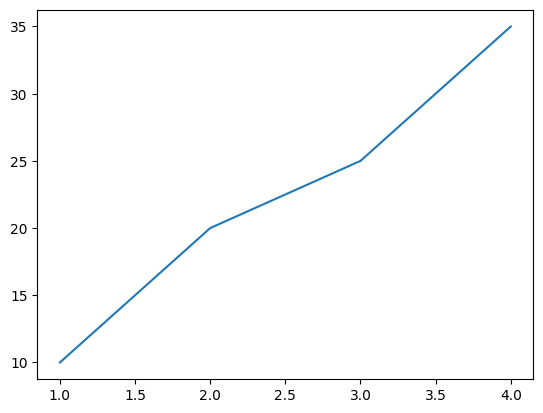

In [11]:
fig, ax = plt.subplots()
ax.plot(
    [1, 2, 3, 4], 
    [10, 20, 25, 35]
)
fig.show()

### Legend and Annotations

- The Legend provides labels for plotted elements (`ax.legend()`).
- Annotations add text notes or arrows to highlight important parts of the data (`ax.annotate()`).

/tmp/ipykernel_6125/456241508.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


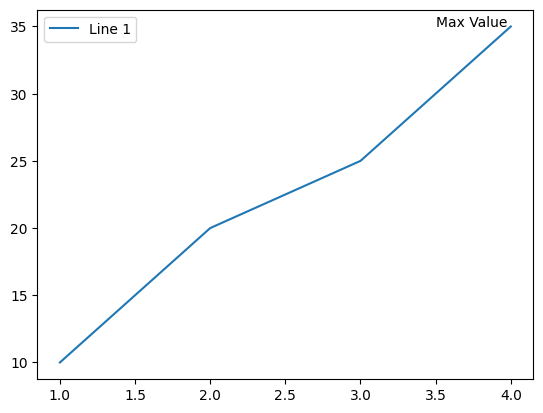

In [12]:
fig, ax = plt.subplots()
ax.plot(
    [1, 2, 3, 4], 
    [10, 20, 25, 35],
    label="Line 1"
)
ax.annotate("Max Value", xy=(4, 35), xytext=(3.5, 35))
ax.legend()
fig.show()

---

Lecture: AI I - Basics 

Exercise: [**Exercise 3.3: Visualisation with Matplotlib**](../03_data/exercises/03_matplotlib.ipynb)

Next: [**Chapter 3.4: Visualisation with Seaborn**]()